In [1]:
from PIL import Image
import cv2
import torch
import math 
import function.utils_rotate as utils_rotate
from IPython.display import display
import os
import function.helper as helper

In [11]:
pwd

'd:\\work\\AIVISION\\license-plate\\license-plate\\license-plate\\License-Plate-Recognition'

In [10]:
%cd ./License-Plate-Recognition

[WinError 2] The system cannot find the file specified: './License-Plate-Recognition'
d:\work\AIVISION\license-plate\license-plate\license-plate\License-Plate-Recognition


In [ ]:
# load yolo model for detect and character detection stage
# please download yolov5 from our link on github
yolo_LP_detect = torch.hub.load('yolov5', 'custom', path='model/LP_detector.pt', force_reload=True, source='local')
yolo_license_plate = torch.hub.load('yolov5', 'custom', path='model/LP_ocr.pt', force_reload=True, source='local')

# set model confidence threshold
# yolo_LP_detect.conf = 0.6
yolo_license_plate.conf = 0.60

YOLOv5  v6.1-179-gf3fecf9 torch 2.5.1 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)

d:\work\AIVISION\license-plate\license-plate\license-plate\License-Plate-Recognition\./yolov5\models\experimental.py:96: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open

In [26]:
#enter image path here
img_file = "test_image/557.png"
img = cv2.imread(img_file)
plates = yolo_LP_detect(img, size=640)

d:\work\AIVISION\license-plate\license-plate\license-plate\License-Plate-Recognition\./yolov5\models\common.py:565: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


In [27]:
yolo_license_plate = torch.hub.load('yolov5', 'custom', path='model/LP_ocr.pt', force_reload=True, source='local')

img_file = "test_image/557.png"
img = cv2.imread(img_file)
plates = yolo_LP_detect(img, size=640)

list_plates = plates.pandas().xyxy[0].values.tolist()
list_read_plates = set()
count = 0
if len(list_plates) == 0:
    lp = helper.read_plate(yolo_license_plate,img)
    if lp != "unknown":
        list_read_plates.add(lp)
else:
    for plate in list_plates:
        flag = 0
        x = int(plate[0]) # xmin
        y = int(plate[1]) # ymin
        w = int(plate[2] - plate[0]) # xmax - xmin
        h = int(plate[3] - plate[1]) # ymax - ymin  
        crop_img = img[y:y+h, x:x+w]
        cv2.rectangle(img, (int(plate[0]),int(plate[1])), (int(plate[2]),int(plate[3])), color = (0,0,225), thickness = 2)
        cv2.imwrite("crop.jpg", crop_img)
        rc_image = cv2.imread("crop.jpg")
        lp = ""
        count+=1
        for cc in range(0,2):
            for ct in range(0,2):
                lp = helper.read_plate(yolo_license_plate, utils_rotate.deskew(crop_img, cc, ct))
                if lp != "unknown":
                    list_read_plates.add(lp)
                    flag = 1
                    break
            if flag == 1:
                break

d:\work\AIVISION\license-plate\license-plate\license-plate\License-Plate-Recognition\./yolov5\models\common.py:565: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
d:\work\AIVISION\license-plate\license-plate\license-plate\License-Plate-Recognition\./yolov5\models\common.py:565: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
d:\work\AIVISION\license-plate\license-plate\license-plate\License-Plate-Recognition\./yolov5\models\common.py:565: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
d:\work\AIVISION\license-plate\license-plate\license-plate\License-Plate-Recognition\./yolov5\models\common.py:565: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please us

{'75H1-42599', '75H1-36121', '75A-18283'}


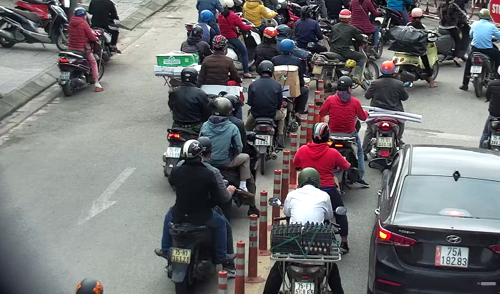

In [28]:
print(list_read_plates)
img = Image.open(img_file)
basewidth = 500
wpercent = (basewidth/float(img.size[0]))
hsize = int((float(img.size[1])*float(wpercent)))
img = img.resize((basewidth,hsize))
display(img)